In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import BallTree
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import time, math, json, os

In [2]:
data_sephora= pd.read_csv(r'C:\Users\nadia\ML\sephora_website_dataset.csv', delimiter=',' , encoding='latin-1', error_bad_lines=False)
data= data_sephora.drop([ 'name','size', 'number_of_reviews', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
data.head(10)

,id,brand,category,rating,love,price
0,2218774,Acqua Di Parma,Fragrance,4.0,3002,66.0
1,2044816,Acqua Di Parma,Cologne,4.5,2700,66.0
2,1417567,Acqua Di Parma,Perfume,4.5,2600,180.0
3,1417617,Acqua Di Parma,Perfume,4.5,2900,120.0
4,2218766,Acqua Di Parma,Fragrance,3.5,943,72.0
5,1417609,Acqua Di Parma,Perfume,4.5,2600,180.0
6,1638832,Acqua Di Parma,Perfume,4.5,5000,210.0
7,1284462,Acqua Di Parma,Cologne,5.0,719,120.0
8,2221588,Acqua Di Parma,Body Mist & Hair Mist,4.0,800,58.0
9,2221596,Acqua Di Parma,Perfume,3.0,2100,58.0


In [3]:
data.dtypes

id            int64
brand        object
category     object
rating      float64
love          int64
price       float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9168 non-null   int64  
 1   brand     9168 non-null   object 
 2   category  9168 non-null   object 
 3   rating    9168 non-null   float64
 4   love      9168 non-null   int64  
 5   price     9168 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 429.9+ KB


In [5]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(data.rating.min()))
print('Maximum rating is: %d' %(data.rating.max()))

Minimum rating is: 0
Maximum rating is: 5


In [6]:
#Check for missing values, cek baris yang kosong
print('Number of missing values across columns: \n',data.isnull().sum())

Number of missing values across columns: 
 id          0
brand       0
category    0
rating      0
love        0
price       0
dtype: int64


In [7]:
#Taking subset of the dataset
data=data.iloc[:9168,0:]

In [8]:
data.describe()['rating']  #perhitungan nilai rating

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [9]:
data.describe()['love'] #perhitungan nilai yg menyukai produk

count    9.168000e+03
mean     1.627859e+04
std      4.260651e+04
min      0.000000e+00
25%      1.600000e+03
50%      4.800000e+03
75%      1.380000e+04
max      1.300000e+06
Name: love, dtype: float64

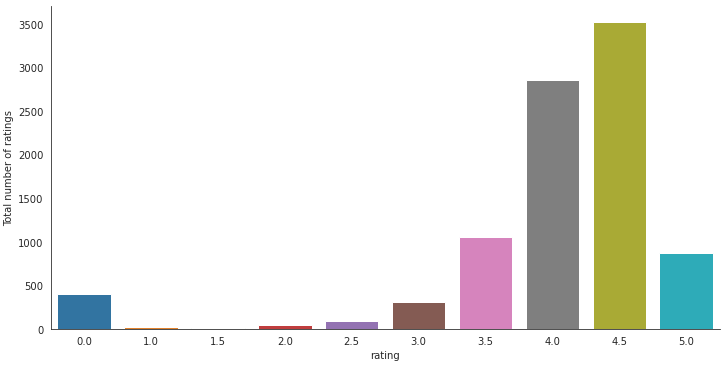

In [10]:
#RATING
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [11]:
#analisis rating berdasarkan brand

no_of_rated_brand_per_user = data.groupby(by='brand')['rating'].count().sort_values(ascending=False)
no_of_rated_brand_per_user.head()

brand
SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
Name: rating, dtype: int64

In [12]:
no_of_rated_brand_per_user.describe()

count    324.000000
mean      28.296296
std       39.740784
min        1.000000
25%        7.000000
50%       17.000000
75%       35.000000
max      496.000000
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Brand yang rating bagus'}>

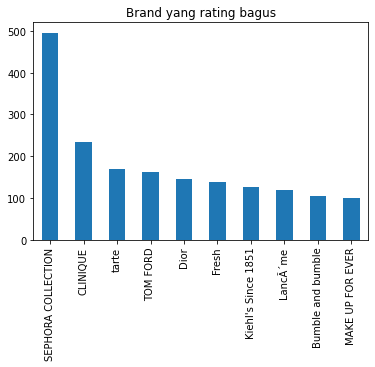

In [13]:
data['brand'].value_counts().head(10).plot.bar( title='Brand yang rating bagus')

In [ ]:
#https://www.kaggle.com/hyunyouchoi/recommender-system-product-and-user-based

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk 
nltk.download('punkt')
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
#from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nadia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [90]:
data_sephora= pd.read_csv(r'C:\Users\nadia\ML\sephora_website_dataset.csv', delimiter=',' , encoding='latin-1', error_bad_lines=False)
data= data_sephora.drop(['price','size', 'number_of_reviews', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
data.head(4)

,id,brand,category,name,rating,love
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,4.0,3002
1,2044816,Acqua Di Parma,Cologne,Colonia,4.5,2700
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,4.5,2600
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,4.5,2900


In [91]:
print(data.columns)
print(data.shape)

Index(['id', 'brand', 'category', 'name', 'rating', 'love'], dtype='object')
(9168, 6)


In [92]:
count = data.groupby("category", as_index=False).count()
mean = data.groupby("category", as_index=False).mean()

#merge two dataset create 
df = pd.merge(data, count, how='right', on=['category'])

In [93]:
#rename column
df["Count"] = df["id_y"]
df["rating"] = df["rating_x"]
df["brand"] = df["brand_x"]


#Create New datafram with selected variables
df= df[['category','brand','rating',"Count"]] 

In [94]:
#choose only products have over 100 reviews
df = df.sort_values(by=['Count'], ascending=False)
df1 = df[df.Count >= 80]

In [95]:
#create new dataframe as combining all summary with same product Id
df3 = data.groupby("category", as_index=False).mean()
combine_brand = df1.groupby("category")["brand"].apply(list)
combine_brand = pd.DataFrame(combine_brand)
combine_brand.to_csv("combine_brand.csv")

In [96]:
#create with certain columns
df2 = pd.read_csv("combine_brand.csv")
df2 = pd.merge(df2, df3, on="category", how='inner')
df2 = df2[['category','brand','rating']]

In [97]:
df2.shape

(37, 3)

In [98]:
#Text Clean process - Summary column

#function for tokenizing summary
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [99]:
#reset index and drop duplicate rows
df2["Brand_Clean"] = df2["brand"].apply(cleanup)
df2 = df2.drop_duplicates(['rating'], keep='last')
df2 = df2.reset_index()

In [100]:
from pandas import DataFrame 

docs = df2["Brand_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 

df4 = DataFrame(X.A, columns=vect.get_feature_names())
df4 = df4.astype(int)

df4.to_csv("df4.csv")

In [101]:
baca= pd.read_csv(r'C:\Users\nadia\ML\df4.csv', delimiter=',' , encoding='latin-1', error_bad_lines=False)
#data= data_sephora.drop(['name', 'love', 'price','size', 'number_of_reviews', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
#baca.head(4)

In [102]:
# First let's create a dataset called X
X = np.array(df4)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(df4)))
df4_train = X[:tsize]
df4_test = X[tsize:]
#len of train and test
lentrain = len(df4_train)
lentest = len(df4_test)

In [103]:
#Klasifikasi dengan KNN untuk menemukan kesamaan pada produk
#sample ada 272
# Next we will instantiate a nearest neighbor object, and call it n4rs. Then we will fit it to dataset X.
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(df4_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = nbrs.kneighbors(df4_train)

In [104]:
for i in range(lentest):
    a = nbrs.kneighbors([df4_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df2["category"][lentrain + i] ," and this average Rating is ",df2["rating"][lentrain + i])
    print ("The first similar product is ", df2["category"][first_related_product] ," and this average Rating is ",df2["rating"][first_related_product])
    print ("The second similar product is ", df2["category"][second_related_product] ," and this average Rating is ",df2["rating"][second_related_product])
    print ("\n-----------------------------------------------------------\n")

Based on product reviews, for  Rollerballs & Travel Size  and this average Rating is  4.1644736842105265
The first similar product is  Perfume Gift Sets  and this average Rating is  3.3051470588235294
The second similar product is  Cologne  and this average Rating is  4.55379746835443

-----------------------------------------------------------

Based on product reviews, for  Scalp & Hair Treatments  and this average Rating is  4.036585365853658
The first similar product is  Hair Masks  and this average Rating is  3.95
The second similar product is  Face Oils  and this average Rating is  4.345238095238095

-----------------------------------------------------------

Based on product reviews, for  Setting Spray & Powder  and this average Rating is  4.047413793103448
The first similar product is  Concealer  and this average Rating is  4.115
The second similar product is  Foundation  and this average Rating is  3.9723926380368098

----------------------------------------------------------

In [105]:
#predicting review score

df4_train_target = df3["rating"][:lentrain]
df4_test_target = df3["rating"][lentrain:lentrain+lentest]
df4_train_target = df4_train_target.astype(int)
df4_test_target = df4_test_target.astype(int)

n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df4_train, df4_train_target)
knnpreds_test = knnclf.predict(df4_test)
print (knnpreds_test)

print(classification_report(df4_test_target, knnpreds_test))
print (accuracy_score(df4_test_target, knnpreds_test))

[3 3 3 4 3 3]
              precision    recall  f1-score   support

           3       0.80      1.00      0.89         4
           4       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

0.8333333333333334


In [106]:
#perhitungan berdasarkan love

In [107]:
count = data.groupby("brand", as_index=False).count()
mean = data.groupby("brand", as_index=False).mean()

#merge two dataset create 
df = pd.merge(data, count, how='right', on=['brand'])
df

,id_x,brand,category_x,name_x,rating_x,love_x,id_y,category_y,name_y,rating_y,love_y
0,2162444,8Greens,Beauty Supplements,8G Dietary Supplement,4.5,3500,3,3,3,3,3
1,2321461,8Greens,Beauty Supplements,8Greens Skin Tablet,0.0,488,3,3,3,3,3
2,2298891,8Greens,Beauty Supplements,8Greens Gummies Dietary Supplement,4.0,1700,3,3,3,3,3
3,1794585,AERIN,Perfume,Mediterranean Honeysuckle,4.0,8000,22,22,22,22,22
4,1639228,AERIN,Perfume,Amber Musk,4.5,5600,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...
9163,1935477,tarte,Highlighter,SEA Twinkle Stick Highlighter,4.5,18000,170,170,170,170,170
9164,2041945,trÃ¨StiQue,Lip Balm & Treatment,Mini Plumping Lip Balm,3.0,6700,4,4,4,4,4
9165,2084358,trÃ¨StiQue,Lipstick,Prime + Color Lip Glaze,3.5,3600,4,4,4,4,4
9166,2143303,trÃ¨StiQue,Highlighter,All Over Starlighter Powder Highlight Stick,4.5,2500,4,4,4,4,4


In [108]:
#rename column
df["Count"] = df["love_x"]
df["rating"] = df["rating_x"]
df["id"] = df["id_x"]
df["category"] = df["category_x"]

#Create New datafram with selected variables
df= df[['id', 'brand', 'category', 'rating',"Count"]] 

In [109]:
#choose only products have over 100 reviews
df = df.sort_values(by=['Count'], ascending=False)
df1 = df[df.Count >= 500]
df1

,id,brand,category,rating,Count
3837,1890623,KVD Vegan Beauty,Lipstick,4.5,1300000
5434,2172310,NARS,Concealer,4.5,770700
206,1056084,Anastasia Beverly Hills,Eyebrow,4.5,660000
4599,870618,Laura Mercier,Setting Spray & Powder,4.5,657100
5439,899393,NARS,Blush,4.5,646600
...,...,...,...,...,...
3184,1436666,HERMÃS,Body Lotions & Body Oils,3.5,506
6848,2290807,SEPHORA COLLECTION,Exfoliators,2.5,505
500,2295905,BURBERRY,Perfume,4.0,503
7124,2323152,Shiseido,Face Wash & Cleansers,5.0,502


In [110]:
#membuat df baru yg menggabungkan berdasarkan kesamaan brand
df3 = data.groupby("brand", as_index=False).mean()
combine_love = df1.groupby("brand")["category"].apply(list)
combine_love = pd.DataFrame(combine_love)
combine_love.to_csv("combine_love.csv")

In [111]:
#add kolom nilai pasti pada rating dan love
df2 = pd.read_csv("combine_love.csv")
df2 = pd.merge(df2, df3, on="brand", how='inner')
df2 = df2[['brand','category', 'rating', 'love']]
df2

,brand,category,rating,love
0,8Greens,"['Beauty Supplements', 'Beauty Supplements']",2.833333,1896.000000
1,AERIN,"['Lip Balm & Treatment', 'Perfume', 'Rollerbal...",4.204545,3439.363636
2,ALTERNA Haircare,"['Hair Styling Products', 'Shampoo', 'Conditio...",4.226190,5939.523810
3,AMOREPACIFIC,"['Facial Peels', 'BB & CC Cream', 'Toners', 'M...",3.984848,7513.242424
4,Acqua Di Parma,"['Perfume', 'Fragrance', 'Perfume', 'Perfume',...",3.485714,1096.571429
...,...,...,...,...
319,shu uemura,"['Hair Oil', 'Shampoo', 'Scalp & Hair Treatmen...",4.000000,890.488889
320,stila,"['Eyeshadow', 'Eyeliner', 'Eyeshadow', 'Eyelin...",4.357143,140942.857143
321,surratt beauty,"['Eyeshadow', 'Blush', 'Eyelash Curlers', 'Lip...",4.060000,6753.920000
322,tarte,"['Blush', 'Eye Palettes', 'Foundation', 'Found...",4.005882,33294.764706


In [112]:
df3

,brand,id,rating,love
0,8Greens,2.260932e+06,2.833333,1896.000000
1,AERIN,1.922516e+06,4.204545,3439.363636
2,ALTERNA Haircare,2.087476e+06,4.226190,5939.523810
3,AMOREPACIFIC,1.846528e+06,3.984848,7513.242424
4,Acqua Di Parma,1.916005e+06,3.485714,1096.571429
...,...,...,...,...
319,shu uemura,1.907499e+06,4.000000,890.488889
320,stila,1.384544e+06,4.357143,140942.857143
321,surratt beauty,1.745255e+06,4.060000,6753.920000
322,tarte,2.002967e+06,4.005882,33294.764706


In [113]:
baca= pd.read_csv(r'C:\Users\nadia\ML\combine_love.csv', delimiter=',' , encoding='latin-1', error_bad_lines=False)
#data= data_sephora.drop(['name', 'love', 'price','size', 'number_of_reviews', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
baca.head(4)

,brand,category
0,8Greens,"['Beauty Supplements', 'Beauty Supplements']"
1,AERIN,"['Lip Balm & Treatment', 'Perfume', 'Rollerbal..."
2,ALTERNA Haircare,"['Hair Styling Products', 'Shampoo', 'Conditio..."
3,AMOREPACIFIC,"['Facial Peels', 'BB & CC Cream', 'Toners', 'M..."


In [114]:
df2.shape

(324, 4)

In [115]:
#membersihkan text kolom brand menjadi kolom name_brand_clean

#function for tokenizing name_brand_clean
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [116]:
#reset index and drop duplicate rows
df2["name_brand_Clean"] = df2["brand"].apply(cleanup)
df2 = df2.drop_duplicates(['love'], keep='last')
df2 = df2.reset_index()
df2

,index,brand,category,rating,love,name_brand_Clean
0,0,8Greens,"['Beauty Supplements', 'Beauty Supplements']",2.833333,1896.000000,greens
1,1,AERIN,"['Lip Balm & Treatment', 'Perfume', 'Rollerbal...",4.204545,3439.363636,aerin
2,2,ALTERNA Haircare,"['Hair Styling Products', 'Shampoo', 'Conditio...",4.226190,5939.523810,alterna haircare
3,3,AMOREPACIFIC,"['Facial Peels', 'BB & CC Cream', 'Toners', 'M...",3.984848,7513.242424,amorepacific
4,4,Acqua Di Parma,"['Perfume', 'Fragrance', 'Perfume', 'Perfume',...",3.485714,1096.571429,acqua di parma
...,...,...,...,...,...,...
315,319,shu uemura,"['Hair Oil', 'Shampoo', 'Scalp & Hair Treatmen...",4.000000,890.488889,shu uemura
316,320,stila,"['Eyeshadow', 'Eyeliner', 'Eyeshadow', 'Eyelin...",4.357143,140942.857143,stila
317,321,surratt beauty,"['Eyeshadow', 'Blush', 'Eyelash Curlers', 'Lip...",4.060000,6753.920000,surratt beauty
318,322,tarte,"['Blush', 'Eye Palettes', 'Foundation', 'Found...",4.005882,33294.764706,tarte


In [117]:
from pandas import DataFrame 

docs = df2["name_brand_Clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 

df4 = DataFrame(X.A, columns=vect.get_feature_names())
df4 = df4.astype(int)

df4.to_csv("df4_love.csv")

In [118]:
baca= pd.read_csv(r'C:\Users\nadia\ML\df4_love.csv', delimiter=',' , encoding='latin-1', error_bad_lines=False)
#data= data_sephora.drop(['name', 'love', 'price','size', 'number_of_reviews', 'value_price', 'URL', 'MarketingFlags', 'MarketingFlags_content', 'options', 'details', 'how_to_use', 'ingredients', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], axis=1)
baca

,Unnamed: 0,acqua,beauty,black,bumble,clean,cosmetics,couture,dr,jacobs,...,proactiv,proof,proteins,qhemet,saint,sephora,skin,skincare,sol,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,317,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,318,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# First let's create a dataset called X
X = np.array(df4)
 # create train and test
tpercent = 0.85
tsize = int(np.floor(tpercent * len(df4)))
df4_train = X[:tsize]
df4_test = X[tsize:]
#len of train and test
lentrain = len(df4_train)
lentest = len(df4_test)

In [120]:
#Klasifikasi dengan KNN untuk menemukan kesamaan pada produk
#sample ada 272
# membuat jarak k terdekat
nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(df4_train)

#menemukan k dari setiap titik yang ada di objek X dengan memanggil fungsi kneighbours()
distances, indices = nbrs.kneighbors(df4_train)

In [121]:
for i in range(lentest):
    a = nbrs.kneighbors([df4_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df2["brand"][lentrain + i] ," and this average Love is ",df2["love"][lentrain + i])
    print ("The first similar product is ", df2["brand"][first_related_product] ," and this average Love is ",df2["love"][first_related_product])
    print ("The second similar product is ", df2["brand"][second_related_product] ," and this average Love is ",df2["love"][second_related_product])
    print ("\n-----------------------------------------------------------\n")

Based on product reviews, for  Tory Burch  and this average Love is  4988.5
The first similar product is  Erborian  and this average Love is  8145.357142857143
The second similar product is  Kosas  and this average Love is  19411.11111111111

-----------------------------------------------------------

Based on product reviews, for  Touch In Sol  and this average Love is  35475.0
The first similar product is  Sol de Janeiro  and this average Love is  24968.25925925926
The second similar product is  CHANEL  and this average Love is  9661.307692307691

-----------------------------------------------------------

Based on product reviews, for  Tower 28 Beauty  and this average Love is  14440.0
The first similar product is  KNC Beauty  and this average Love is  1875.0
The second similar product is  ROEN BEAUTY  and this average Love is  3100.0

-----------------------------------------------------------

Based on product reviews, for  Urban Decay  and this average Love is  63784.8289473684

The second similar product is  Kosas  and this average Love is  19411.11111111111

-----------------------------------------------------------

Based on product reviews, for  trÃ¨StiQue  and this average Love is  3525.0
The first similar product is  Erborian  and this average Love is  8145.357142857143
The second similar product is  Kosas  and this average Love is  19411.11111111111

-----------------------------------------------------------



In [122]:
#predicting love score

df4_train_target = df3["rating"][:lentrain]
df4_test_target = df3["rating"][lentrain:lentrain+lentest]
df4_train_target = df4_train_target.astype(int)
df4_test_target = df4_test_target.astype(int)

n_neighbors = 100
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df4_train, df4_train_target)
knnpreds_test = knnclf.predict(df4_test)
print (knnpreds_test)

print(classification_report(df4_test_target, knnpreds_test))
print (accuracy_score(df4_test_target, knnpreds_test))

[4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 4 3 4 4]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.33      0.13      0.19        15
           4       0.67      0.90      0.77        31

    accuracy                           0.62        48
   macro avg       0.33      0.35      0.32        48
weighted avg       0.53      0.62      0.55        48

0.625
